In [47]:
pip install opencv-python

In [48]:
pip install opencv-contrib-python

In [49]:
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import numpy as np #Librería numérica
from scipy import stats
from scipy import mean, var
import math
import pandas as pd

import numpy as np
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Imágenes como matrices
La visión artificial o por computadora se está utilizando cada vez más para el análisis y tratamiento de imágenes mediante algoritmos de inteligencia artificial. Uno de los usos más importantes de OpenCV en la visión por computadora es la detección de rostros y objetos, sobre todo en ámbitos como la fotografía, el marketing o la seguridad.

Una imagen no es más que una matriz estándar de Numpy que contiene píxeles de puntos de datos. Cuanto mayor sea el número de píxeles en una imagen, mejor es su resolución. Puede pensar que los píxeles son pequeños bloques de información dispuestos en forma de una cuadrícula 2D, y la profundidad de un píxel se refiere a la información de color presente en ella.

Las imágenes en color se representan como una combinación de rojo, azul y verde, y todos los demás colores se pueden lograr mezclando estos colores primarios en las proporciones correctas. Formato $RGB$.

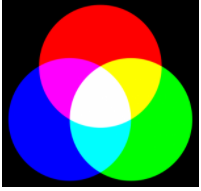

**Nota**: Información tomada de: [OpenCV](https://revistadigital.inesem.es/informatica-y-tics/opencv/)


In [68]:
filename='cat2.PNG' #filename of the image
img = cv2.imread('gdrive/My Drive/Colab Notebooks/cat2.jpg')
type(img)
img.shape

(500, 325, 3)

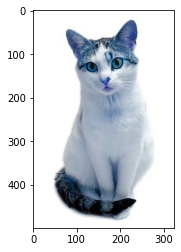

In [52]:
plt.imshow(img)

Lo que obtenemos como resultado es un poco diferente con respecto al color. Esperábamos una imagen de colores brillantes, pero lo que obtenemos es una imagen con cierto matiz azulado. Eso sucede porque OpenCV y matplotlib tienen diferentes órdenes de colores primarios. Mientras que OpenCV lee imágenes en forma de BGR, matplotlib, por otro lado, sigue el orden RGB.

Para evitar este problema, transformaremos el canal a la forma en que matplotlib espera que se use la función cvtColor.

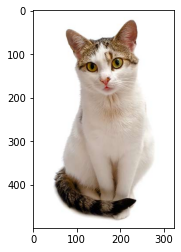

In [53]:
img_cat = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cat)

# Métodos de extracción de características locales
## BRIEF orientado rápido y girado (ORB)

ORB es uno de los métodos de extracción de características locales que supera el inconveniente de SIFT y reduce el tiempo de cálculo. Se basa en el BRIEF (características elementales independientes robustas binarias) y el detector de puntos FAST.

ORB es básicamente una fusión del detector de puntos clave FAST y el descriptor BREVE con muchas modificaciones para mejorar el rendimiento. Primero usa FAST para encontrar puntos clave, luego aplica la medida de esquina de Harris para encontrar los N puntos principales entre ellos. También utiliza la pirámide para producir características multiescala.

In [54]:
orb = cv.ORB_create(nfeatures=1000)
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)

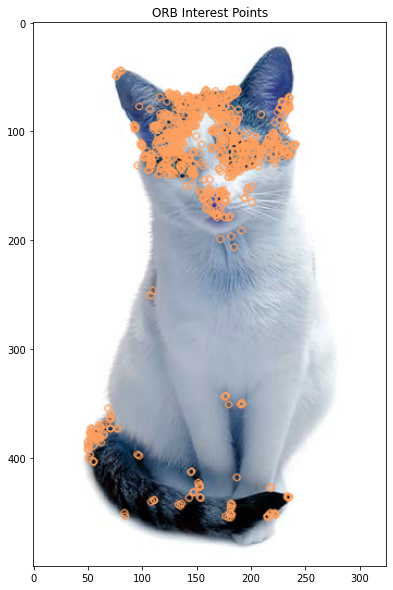

In [75]:
img2 = cv.drawKeypoints(img, kp, None, color=((320,160,95)), flags=0)
plt.figure(figsize=(10, 10))
plt.title('ORB Interest Points')
plt.imshow(img2) #print image with highlights
plt.show()

# Métodos de extracción de características globales

## Histograma de gradientes orientados (HOG)

HOG se utiliza como descriptor de funciones en el procesamiento de imágenes y la visión por computadora para la detección de objetos. Se basa en el histograma de gradientes que actúa como una característica global para la
detección de objetos. En partes locales de la imagen, cuenta las ocurrencias de orientación de gradiente para producir el histograma. 

Básicamente, en una imagen, cada píxel se dibuja en un grupo de celdas. Se compila un histograma de degradados para cada píxel de la celda. Inicialmente, se toma cada píxel en la imagen de a uno por uno. Para cada píxel, se determinan los píxeles que lo rodean directamente. 

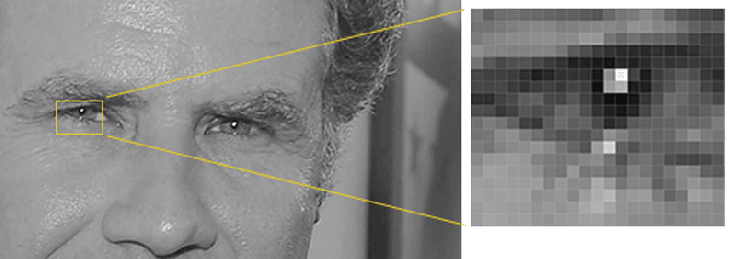

El objetivo es determinar cuán oscuro se compara el píxel actual con los píxeles que lo rodean directamente. Luego se dibuja una flecha que muestre en qué dirección la imagen se vuelve más oscura. 

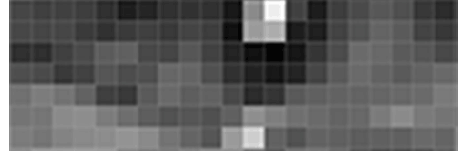

Si se repite este proceso para cada píxel de la imagen, se tiene cada píxel reemplazado por una flecha. Estas flechas se llaman gradientes y muestran el flujo de claro a oscuro en toda la imagen.

In [65]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

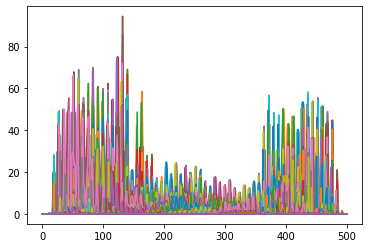

In [66]:
img = cv2.imread('gdrive/My Drive/Colab Notebooks/cat2.jpg')
feat, im = hog(img,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,feature_vector=True)
# img:imagen que se está leyendo
# orientations: número de direcciones para las características en términos de fluctuación de intensidad
# pixels_per_cell: divide la imagen en celdas y define la densidad de píxeles
# cells_per_block: número de celdas tomadas por bloque para mapeo
# visualize: obtener imagen de detección de características
# feature_vector
plt.plot (im)
plt.show()

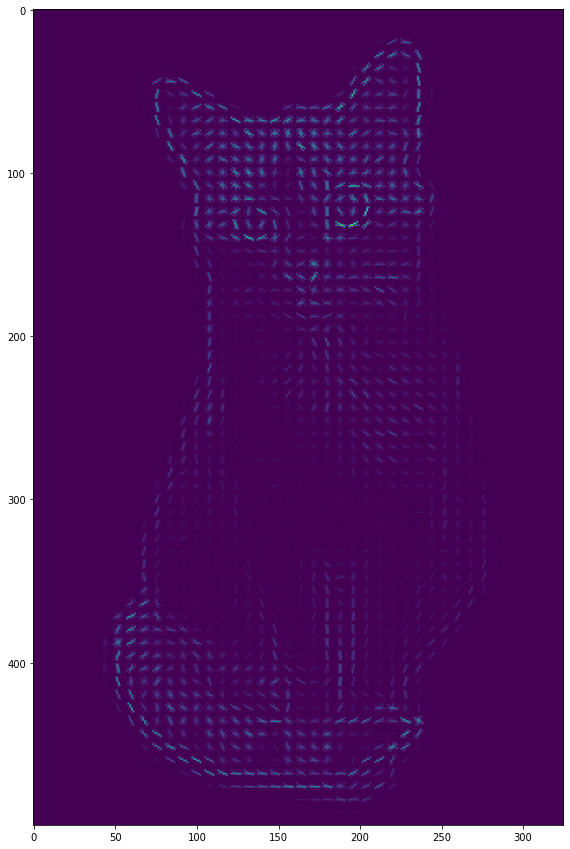

In [67]:
plt.figure(figsize=(15, 15))
plt.imshow(im)
plt.show()